In [1]:
!pip install h5py

In [5]:
def load_data():
    # Charger le jeu de données d'entraînement
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:])  # Caractéristiques du jeu de données d'entraînement
    y_train = np.array(train_dataset["Y_train"][:])  # Étiquettes du jeu de données d'entraînement

    # Charger le jeu de données de test
    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:])  # Caractéristiques du jeu de données de test
    y_test = np.array(test_dataset["Y_test"][:])  # Étiquettes du jeu de données de test
    
    return X_train, y_train, X_test, y_test

In [6]:
# Appel de la fonction load_data pour charger les jeux de données
X_train, y_train, X_test, y_test = load_data()

In [7]:
# Afficher les formes des jeux de données 
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1000, 64, 64)
y_train shape: (1000, 1)
X_test shape: (200, 64, 64)
y_test shape: (200, 1)


## 1. Fonctions

In [9]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [10]:
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [15]:
def log_loss(A, y):
    #L'usage de epsilon = 1e-15 dans le calcul de la perte logistique prévient les erreurs numériques en garantissant que les valeurs passées au logarithme ne soient jamais exactement 0 ou 1.
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))


In [16]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [17]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [18]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [19]:
from tqdm import tqdm

In [23]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

                # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

C:\Users\pc\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\pc\AppData\Local\Temp\ipykernel_26208\233491810.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


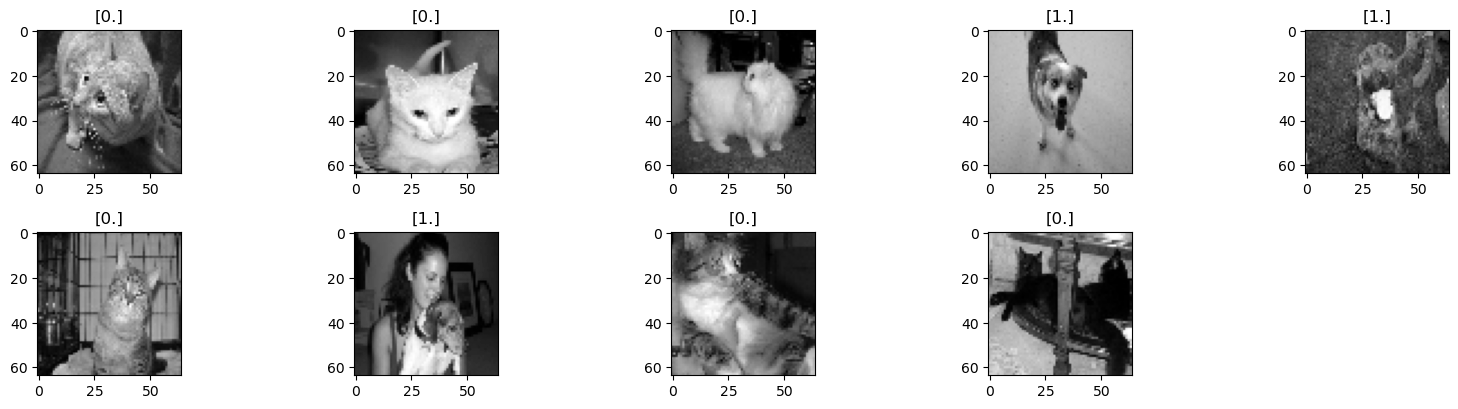

In [26]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [27]:
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train_reshape.shape

(1000, 4096)

In [28]:
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test_reshape.shape

(200, 4096)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_26208\3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\pc\AppData\Local\Temp\ipykernel_26208\3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\pc\AppData\Local\Temp\ipykernel_26208\3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  7%|█████▋                                                                            | 7/100 [00:00<00:03, 29.42it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_26208\3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 11%|████████▉                                                                        | 11/100 [00:00<00:03, 28.88it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_26208\3631861369.py:4: RuntimeWarning: overflow encountered in

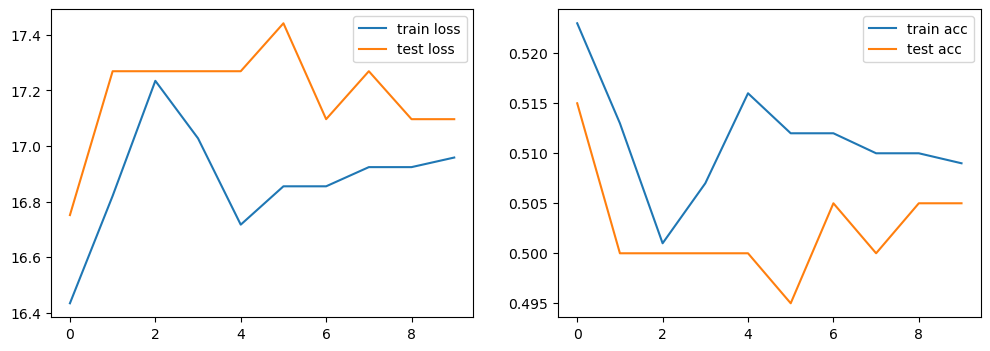

In [32]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_26208\3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


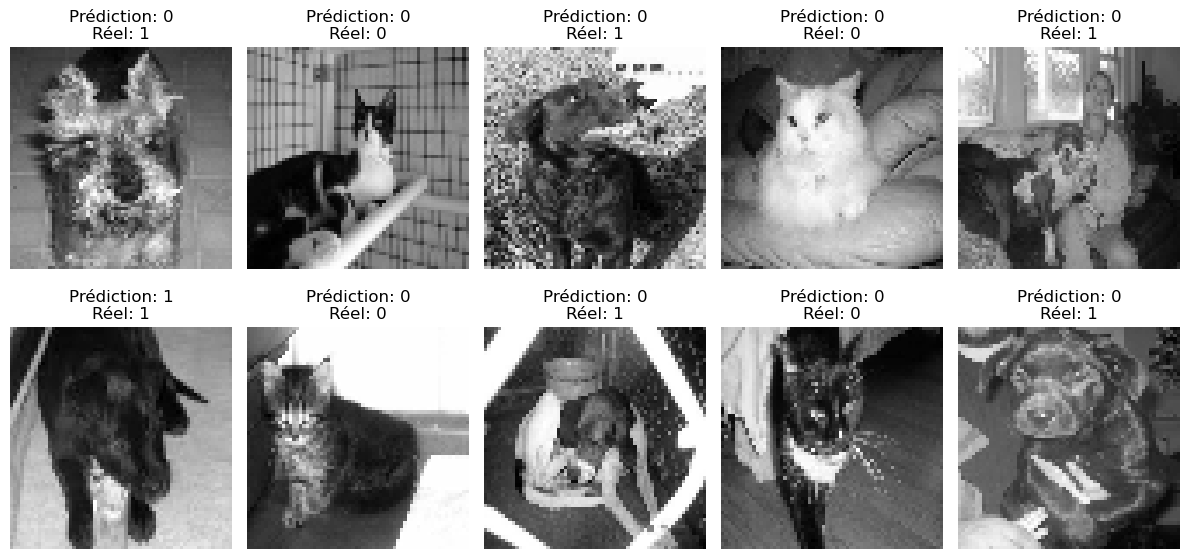

In [33]:
import matplotlib.pyplot as plt

def test_predictions(X_test, y_test, W, b):
    # Prédire les étiquettes pour le jeu de test
    A_test = model(X_test, W, b)
    y_pred = predict(X_test, W, b)

    # Affichage des résultats
    num_images = 10  # Nombre d'images à afficher
    plt.figure(figsize=(12, 6))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[i].reshape(64, 64), cmap='gray')  # Reshape si nécessaire
        plt.title(f'Prédiction: {int(y_pred[i])}\nRéel: {int(y_test[i])}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Appeler la fonction de test avec les données de test
test_predictions(X_test_reshape, y_test, W, b)
